<a href="https://colab.research.google.com/github/Tar-ive/Predicting-Healthcare-Costs-with-Machine-Learning-A-Regression-Algorithm-Project/blob/main/Diabetes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as  sns

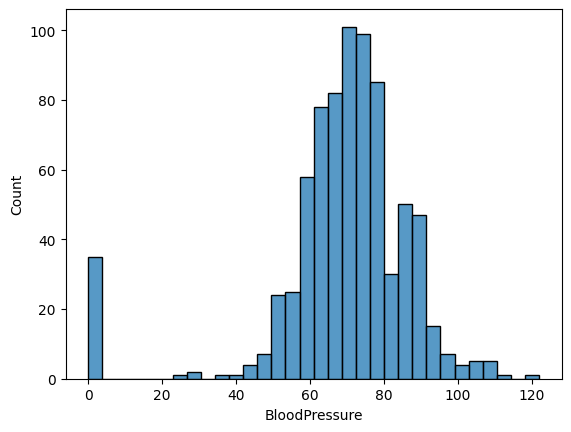

In [8]:
sns.histplot(data=df, x='BloodPressure')
plt.show()

In [9]:
corr_matrix = df.corr()

<Axes: >

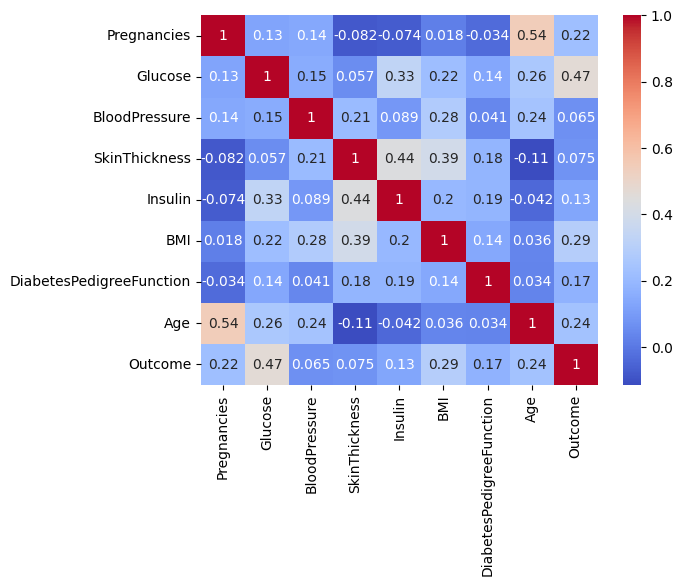

In [10]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [11]:
corr_table = corr_matrix.unstack().to_frame().reset_index()
corr_table.columns = ['Variable 1', 'Variable 2', 'Correlation']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the correlation table
print(corr_table)

                  Variable 1                Variable 2  Correlation
0                Pregnancies               Pregnancies     1.000000
1                Pregnancies                   Glucose     0.129459
2                Pregnancies             BloodPressure     0.141282
3                Pregnancies             SkinThickness    -0.081672
4                Pregnancies                   Insulin    -0.073535
5                Pregnancies                       BMI     0.017683
6                Pregnancies  DiabetesPedigreeFunction    -0.033523
7                Pregnancies                       Age     0.544341
8                Pregnancies                   Outcome     0.221898
9                    Glucose               Pregnancies     0.129459
10                   Glucose                   Glucose     1.000000
11                   Glucose             BloodPressure     0.152590
12                   Glucose             SkinThickness     0.057328
13                   Glucose                   I

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [17]:
from sklearn.linear_model import LogisticRegression


In [18]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
y_pred = lr.predict(X_test)

In [20]:
cv_scores = cross_val_score(lr, X, y, cv=3)
print('Cross-validation scores:', cv_scores)
print('Average cross-validation score:', cv_scores.mean())

Cross-validation scores: [0.76171875 0.75       0.8046875 ]
Average cross-validation score: 0.7721354166666666


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7532467532467533


In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [25]:
params = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__penalty': ['l1', 'l2']
}

In [26]:
grid = GridSearchCV(pipe, param_grid=params, cv=3)
grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__penalty': ['l1', 'l2']})

In [27]:
print("Best hyperparameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

Best hyperparameters:  {'classifier__C': 10, 'classifier__penalty': 'l2'}
Best cross-validation score:  0.7703172325840906


In [28]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(C=10, penalty='l2', random_state=42))
])

In [29]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=10, random_state=42))])

In [30]:
accuracy = pipe.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7532467532467533


In [31]:
import numpy as np 

In [32]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
threshold = 0.7
corr_matrix = df[features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df.drop(to_drop, axis=1, inplace=True)

<ipython-input-32-eca86227d60e>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
# from sklearn.ensemble import BaggingClassifier

# # Create the BaggingClassifier object
# bag_clf = BaggingClassifier(base_estimator=LogisticRegression(C=1, penalty='l2', solver='liblinear'),
#                             n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

# # Fit the BaggingClassifier object to the data
# bag_clf.fit(X_train_scaled, y_train)

# # Calculate the accuracy of the BaggingClassifier object
# acc_bag = bag_clf.score(X_test_scaled, y_test)
# # print("Accuracy: ", acc_bag)

NameError: ignored

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_classifier = RandomForestClassifier()

In [37]:
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

In [38]:
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.78861789 0.82926829 0.72357724 0.73170732 0.80327869]
Average cross-validation score: 0.7752898840463814


In [39]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = rf_classifier.predict(X_test)


In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


In [42]:
from keras.models import Sequential
from keras.layers import Dense

In [43]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [45]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
20/20 [==============================] - 1s 16ms/step - loss: 0.6479 - accuracy: 0.6482 - val_loss: 0.5910 - val_accuracy: 0.7338
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5729 - accuracy: 0.7573 - val_loss: 0.5424 - val_accuracy: 0.7597
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.7655 - val_loss: 0.5091 - val_accuracy: 0.7857
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.7655 - val_loss: 0.4867 - val_accuracy: 0.7792
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.7704 - val_loss: 0.4820 - val_accuracy: 0.7922
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4522 - accuracy: 0.7818 - val_loss: 0.4818 - val_accuracy: 0.7792
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4419 - accuracy: 0.7915 - val_loss: 0.4838 - val_accuracy: 0.7727
Epoch 8/50
20/20 [=

In [46]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7077922224998474
